In [5]:
from transformers import GPT2Model, GPT2Tokenizer
import torch
# Load pre-trained model
local_path = "models/gpt2"

tokenizer = GPT2Tokenizer.from_pretrained(local_path)
model = GPT2Model.from_pretrained(local_path, output_attentions=True, output_hidden_states=True)

# Architecture summary
print(model)


GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [ ]:
from torchviz import make_dot

# inputs = torch.randint(0, 50257, (1, 10))
# outputs = model(inputs).last_hidden_state
# make_dot(outputs, params=dict(model.named_parameters()))

# Plot already saved as 'gpt2_architecture.png'


In [11]:
text = "Robotics is shaping the future. It is amazing."
inputs = tokenizer(text, return_tensors="pt")

outputs = model(**inputs)
attentions = outputs.attentions        # list of (batch, heads, seq_len, seq_len)
hidden_states = outputs.hidden_states  # list of (batch, seq_len, hidden_dim)
print(f"Number of attention layers: {len(attentions)}")
print(f"Number of hidden states layers: {len(hidden_states)}")

Number of attention layers: 12
Number of hidden states layers: 13


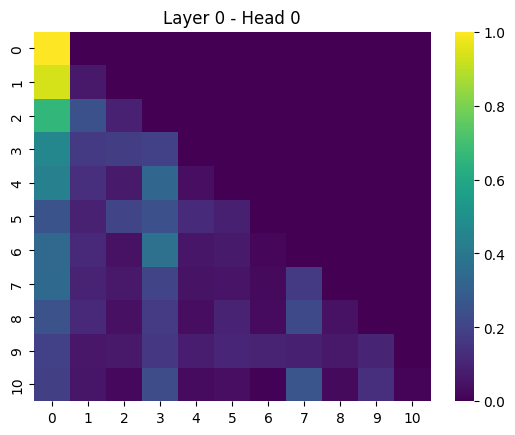

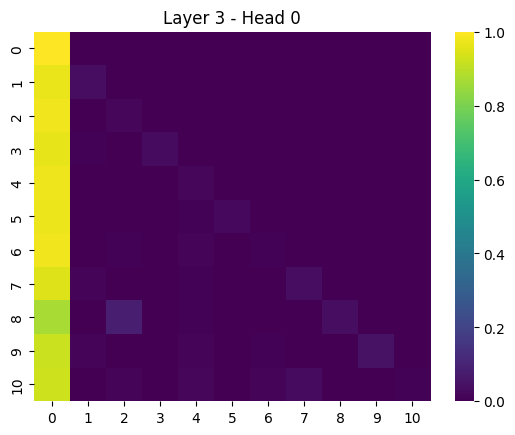

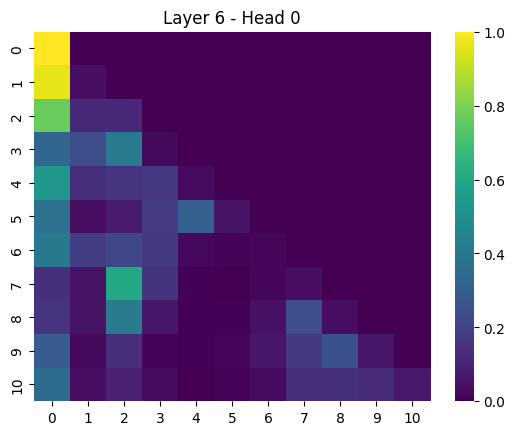

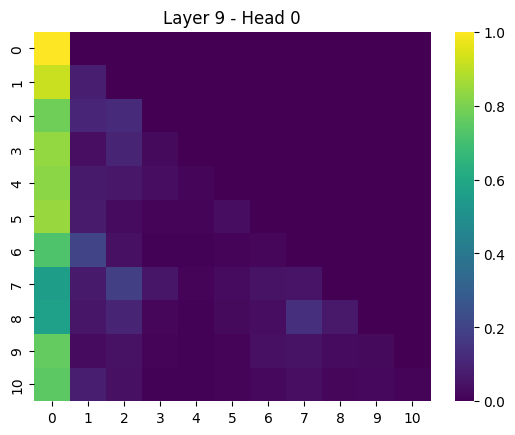

In [12]:
# Visualize attention

import seaborn as sns
import matplotlib.pyplot as plt

for layer in [0, 3, 6, 9]:
    head_attn = attentions[layer][0, 0].detach().numpy()
    sns.heatmap(head_attn, cmap="viridis")
    plt.title(f"Layer {layer} - Head 0")
    plt.show()



In [13]:
# Embedding states visualization

from sklearn.decomposition import PCA

# Token embeddings
embeddings = model.wte.weight.detach().numpy()
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.scatter(reduced[:,0], reduced[:,1], s=1)
plt.title("GPT-2 Token Embedding Space (PCA)")
plt.show()


ModuleNotFoundError: No module named 'sklearn'